Author: Aleksandar Nikolic

Ukupan broj sijalica: 18


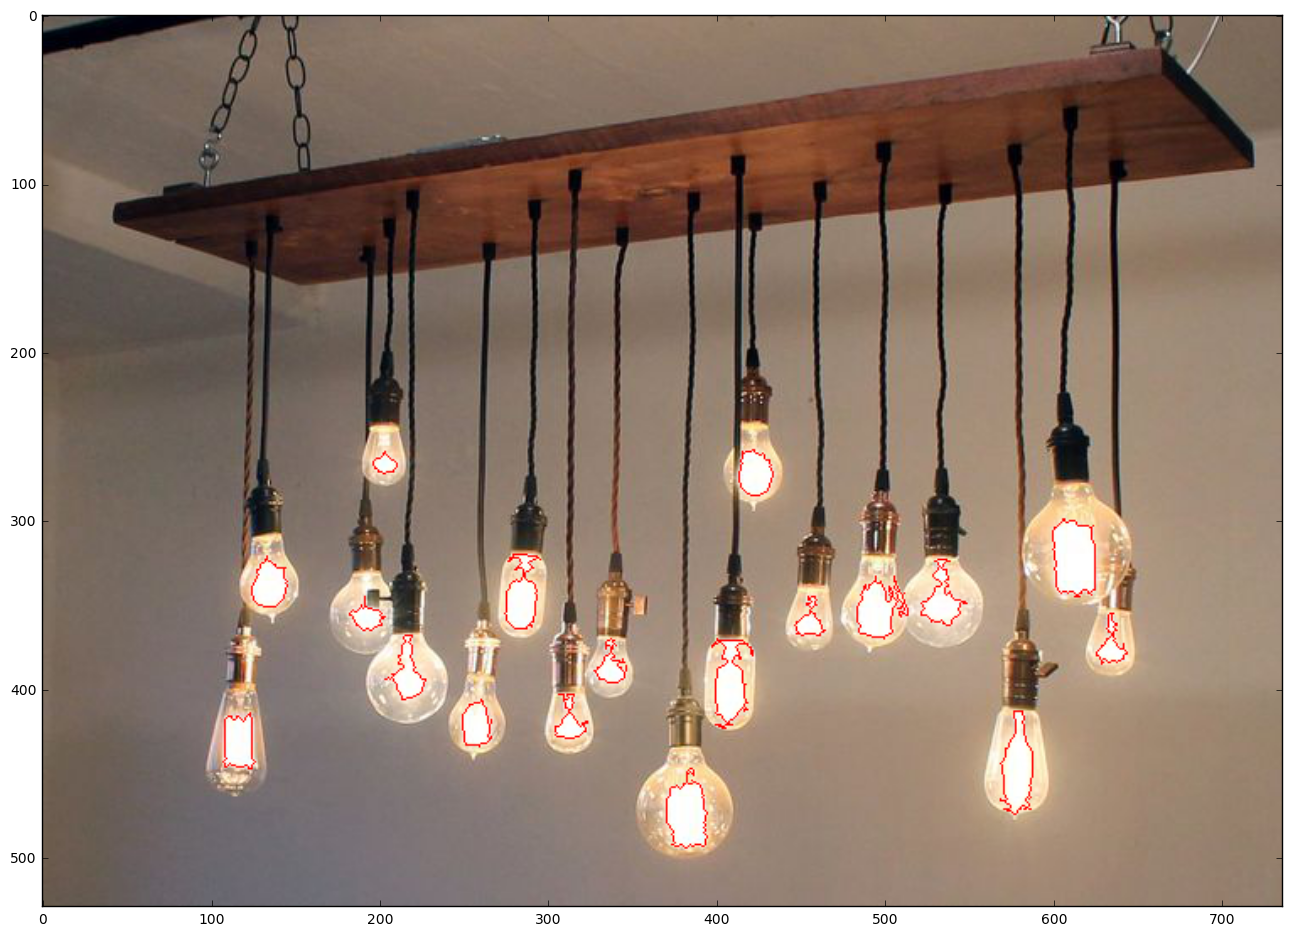

In [2]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

img_bulb = cv2.cvtColor(cv2.imread('../../images/bulbs.jpg'), cv2.COLOR_BGR2RGB)
#plt.imshow(img_bulb)

img_bulb_gs = cv2.cvtColor(img_bulb, cv2.COLOR_RGB2GRAY) # konvert u grayscale
#plt.imshow(img_bulb_gs, 'gray')

ret, img_bulb_bin = cv2.threshold(img_bulb_gs, 240, 255, cv2.THRESH_BINARY)
plt.imshow(img_bulb_bin, 'gray')

img, contours, hierarchy = cv2.findContours(img_bulb_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#img = img_bulb.copy()
#cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
#plt.imshow(img)

contours_bulb = [] #ovde ce biti samo konture koje pripadaju bar-kodu
for contour in contours: # za svaku konturu
    center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
    width, height = size
    if width > 10 and height > 10: # uslov da kontura pripada bar-kodu
        contours_bulb.append(contour) # ova kontura pripada bar-kodu

img = img_bulb.copy()
cv2.drawContours(img, contours_bulb, -1, (255, 0, 0), 1)
plt.imshow(img)
print 'Ukupan broj sijalica: %d' % len(contours_bulb)